# List of contents
### 01. Importing libraries and data
### 02. Crosstabs - Intro and practice
### 03. Task - Steps 3 through 8
### 04. Task - Step 9: Visualizations
### 05. Export final dataset

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #4\2023 Instacart Basket Analysis'
ords_prods_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 02. Crosstabs

In [3]:
crosstab = pd.crosstab(ords_prods_final['days_since_prior_order_number'], ords_prods_final['order_number'], dropna = False)

In [4]:
crosstab.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order_number,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810


In [5]:
ords_prods_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order_number', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_of_user', 'spending_level', 'median_days_since_prior_order',
       'ordering_regularity', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

# 03. Task - Steps 3 through 8


Data Security Concerns

PII data has already been addressed. Columns containing information of customers' names and join dates have been removed when it was assessed that would not be needed for analysis.

In [6]:
ords_prods_final['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [7]:
# Step 3
# Create a "region" column based on "state" column.

result = []

for state in ords_prods_final['state']:
    if state in ['Maine', 'New Hampshire', 'Rhode Island','Massachusetts', 'Vermont', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida',
                'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
                'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append("West")
    else:
        result.append(state) # catch errors
    
ords_prods_final['region'] = result

In [8]:
ords_prods_final['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [9]:
region_spending = pd.crosstab(ords_prods_final['region'], ords_prods_final['spending_level'], dropna = False)

In [10]:
region_spending

spending_level,High spender.,Low spender.
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


The spending habits seem to be fairly uniform across all regions. Each region has roughly 5x the amount of orders from low spenders than orders from high spenders. The South has both the most from high spenders and the most from low spenders, followed by the West, then the Midwest. The Northeast has the lowest orders from both groups.

In [11]:
# Step 4
# Create an exclusion flag for low-activity customers
ords_prods_final.loc[ords_prods_final['max_order'] < 5, 'activity_level'] = 'Low activity'

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_20760\4080667939.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_final.loc[ords_prods_final['max_order'] < 5, 'activity_level'] = 'Low activity'


In [12]:
ords_prods_final.loc[ords_prods_final['max_order'] >= 5, 'activity_level'] = 'High activity'

In [13]:
ords_prods_final['activity_level'].value_counts()

activity_level
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [14]:
ords_prods_active = ords_prods_final.loc[ords_prods_final['activity_level'] == 'High activity']

In [15]:
ords_prods_active.shape

(30964564, 31)

In [16]:
ords_prods_final.shape

(32404859, 31)

In [17]:
# Step 5
# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

ords_prods_active.loc[(ords_prods_active['age'] >= 18) 
                      & (ords_prods_active['income'] >= 100000) 
                      & (ords_prods_active['n_dependants'] == 0), 'customer_profile'] = 'High-income childless adult'

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_20760\717979820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_active.loc[(ords_prods_active['age'] >= 18)
C:\Users\Lawrence\AppData\Local\Temp\ipykernel_20760\717979820.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-income childless adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_active.loc[(ords_prods_active['age'] >= 18)


In [18]:
ords_prods_active.loc[(ords_prods_active['age'] >= 18) 
                      & (ords_prods_active['income'] >= 100000) 
                      & (ords_prods_active['n_dependants'] > 0), 'customer_profile'] = 'High-income adult parent'

In [19]:
ords_prods_active.loc[(ords_prods_active['age'] >= 18) 
                      & (ords_prods_active['income'] >= 60000) & (ords_prods_active['income'] < 100000) 
                      & (ords_prods_active['n_dependants'] == 0), 'customer_profile'] = 'Middle-income childless adult'

In [20]:
ords_prods_active.loc[(ords_prods_active['age'] >= 18) 
                      & (ords_prods_active['income'] >= 60000) & (ords_prods_active['income'] < 100000) 
                      & (ords_prods_active['n_dependants'] > 0), 'customer_profile'] = 'Middle-income adult parent'

In [21]:
ords_prods_active.loc[(ords_prods_active['age'] >= 18) 
                      & (ords_prods_active['income'] < 60000) 
                      & (ords_prods_active['n_dependants'] == 0), 'customer_profile'] = 'Low-income childless adult'

In [22]:
ords_prods_active.loc[(ords_prods_active['age'] >= 18) 
                      & (ords_prods_active['income'] < 60000) 
                      & (ords_prods_active['n_dependants'] > 0), 'customer_profile'] = 'Low-income adult parent'

In [23]:
ords_prods_active.loc[(ords_prods_active['age'] < 18) 
                      & (ords_prods_active['n_dependants'] == 0), 'customer_profile'] = 'Teenager without kids'

In [24]:
ords_prods_active.loc[(ords_prods_active['age'] < 18) 
                      & (ords_prods_active['n_dependants'] > 0), 'customer_profile'] = 'Teenager with kids'

In [25]:
ords_prods_active['customer_profile'].value_counts()

customer_profile
High-income adult parent         10638446
Middle-income adult parent        8230005
Low-income adult parent           4356432
High-income childless adult       3568956
Middle-income childless adult     2724407
Low-income childless adult        1446318
Name: count, dtype: int64

There appears to be no orders from customers below the age of 18.

<Axes: xlabel='customer_profile'>

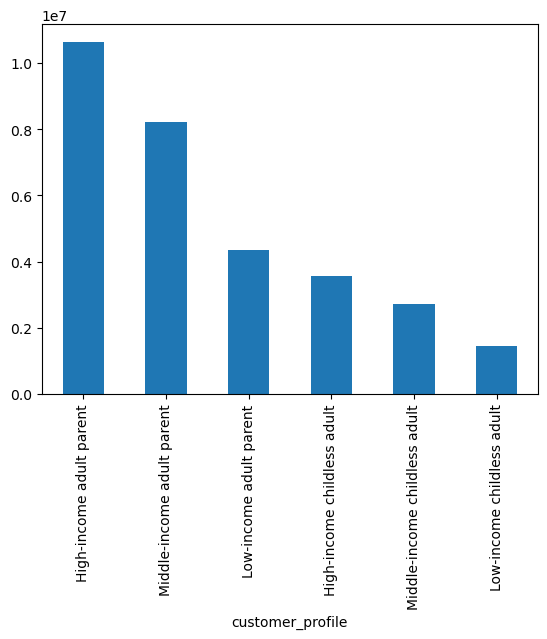

In [26]:
# Step 6
# Create an appropriate visualization to show the distribution of profiles.
ords_prods_active['customer_profile'].value_counts().plot.bar()

In [27]:
# Step 7
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

ords_prods_active.groupby('customer_profile').agg({'median_days_since_prior_order': ['min', 'max', 'mean'], 
                                                   'avg_price_of_user': ['min', 'max', 'mean']})

median_days_since_prior_order                   \
                                                        min   max       mean   
customer_profile                                                               
High-income adult parent                                0.0  30.0   9.910381   
High-income childless adult                             0.0  30.0   9.797674   
Low-income adult parent                                 0.0  30.0  10.319674   
Low-income childless adult                              0.0  30.0  10.347558   
Middle-income adult parent                              0.0  30.0   9.845025   
Middle-income childless adult                           0.0  30.0   9.900336   

                              avg_price_of_user                           
                                            min           max       mean  
customer_profile                                                          
High-income adult parent                    7.0  10209.987755  16.322738  
High-income childless adult                 7.0  15006.940000  16.875162  
Low-income adult parent                     1.0     21.272202   7.091879  
Low-income childless adult                  1.0     20.229362   7.089161  
Middle-income adult parent                  7.0   3402.921296   8.663630  
Middle-income childless adult               7.0   5135.893590   8.512244

In [28]:
# Step 8
# Compare your customer profiles with regions and departments.

regions_customers = pd.crosstab(ords_prods_active['customer_profile'], ords_prods_active['region'], dropna = False)
regions_customers

region,Midwest,Northeast,South,West
customer_profile,,,,
High-income adult parent,2553391,1902743,3482421,2699891
High-income childless adult,846702,613741,1181524,926989
Low-income adult parent,1016393,757175,1476384,1106480
Low-income childless adult,324703,262959,489600,369056
Middle-income adult parent,1868913,1450285,2770401,2140406
Middle-income childless adult,651411,477782,910809,684405


There appears to be the most orders from customers in the South, followed by the West, the Midwest, and then the Northeast. This seems uniform across all classifications of the customer profile based on income, parental status, and adulthood.

Income level is classified based on the following: Low-income = less than 60,000, Middle-income = 60,000 to 99,999, High-income = 100,000 and greater

In [29]:
departments_customers = pd.crosstab(ords_prods_active['customer_profile'], ords_prods_active['department_id'], dropna = False)
departments_customers

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
High-income adult parent,740645,11804,394145,3166897,50874,89610,842351,33256,295073,10686,...,253300,629245,222490,365526,1803606,241479,148228,826521,344940,22493
High-income childless adult,247855,3946,133566,1070105,18268,30381,284111,11833,97658,3532,...,82252,210719,75106,119727,602605,78480,48476,278080,117159,6962
Low-income adult parent,285020,4811,144938,1153068,21768,31212,446244,11498,94814,5606,...,62010,227683,110524,117322,675748,106550,42912,607439,138347,8640
Low-income childless adult,94049,1727,47189,380108,6824,10110,148339,3928,31712,1694,...,19926,75978,36445,38851,227210,35264,14334,201434,46930,3137
Middle-income adult parent,566718,9082,300350,2483867,35158,70708,637965,24704,227953,9159,...,193593,481873,171404,278206,1403452,180470,115924,642008,267165,17700
Middle-income childless adult,187444,3041,100640,825228,11735,23970,212891,7841,74926,2774,...,63700,157207,54881,92442,464561,57614,40518,210924,89293,5836


In [30]:
# Import departments data for a data dictionary
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

# Transposing df_dep
df_dep_t = df_dep.T
df_dep_t

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


The distribution of customer profiles based on income, parental status, and adulthood in the orders for each department appears to follow the same pattern as the overall distribution. The number of orders for goods of each department appear to be the highest for high-income parents, followed by middle-income parents, low-income parents, and then non-parents from the highest income to the lowest. 

The closest margin is between low-income parents and high-income non-parents. There are a few categories where there are actually slightly more orders of the latter than the former. These notable departments are Pets (8), Dry Goods Pasta (9), Personal Care (11), Canned Goods (15), and Babies (18). Orders for baby products being even just slightly higher from high-income non-parents than low-income parents seems odd.

In [31]:
# Compare regions and departments
regions_departments = pd.crosstab(ords_prods_active['department_id'], ords_prods_active['region'], dropna = False)
regions_departments

region,Midwest,Northeast,South,West
department_id,,,,
1,498225,370436,709906,543164
2,7983,6268,11579,8581
3,261753,199300,371620,288155
4,2134115,1593004,3027476,2324678
5,34043,25017,48813,36754
6,60666,44678,84649,65998
7,598979,462929,859419,650574
8,21358,17734,29909,24059
9,193463,143817,272813,212043


There appears to be the most orders from customers in the South, followed by the West, the Midwest, and then the Northeast. This pattern appears to be the case for all departments. 

In [32]:
ords_prods_active['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

In [33]:
# Compare customer profiles and price ranges
profile_price_ranges = pd.crosstab(ords_prods_active['customer_profile'], ords_prods_active['price_range_loc'], dropna = False)
profile_price_ranges

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
High-income adult parent,152486,3165620,7320340
High-income childless adult,49816,1060991,2458149
Low-income adult parent,34311,1648348,2673773
Low-income childless adult,10771,548446,887101
Middle-income adult parent,113701,2441634,5674670
Middle-income childless adult,36868,809801,1877738


In [37]:
# Compare department_id and price ranges
departments_price_ranges = pd.crosstab(ords_prods_active['department_id'], ords_prods_active['price_range_loc'], dropna = False)
departments_price_ranges

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,647617,1474114
2,0,15259,19152
3,0,274986,845842
4,0,2585708,6493565
5,0,33046,111581
6,0,73203,182788
7,0,814697,1757204
8,0,28165,64895
9,0,284346,537790


In [43]:
# Compare department_id and frequency of orders (ordering_regularity)
departments_freq = pd.crosstab(ords_prods_active['department_id'], ords_prods_active['ordering_regularity'], dropna = False)
departments_freq 

ordering_regularity,Frequent customer.,Non-frequent customer.,Regular customer.
department_id,,,
1,1368221,228335,525175
2,23545,3322,7544
3,770435,103019,247374
4,6361055,788065,1930153
5,100491,13271,30865
6,170746,26162,59083
7,1756158,244136,571607
8,58509,9753,24798
9,534052,87959,200125


In [46]:
# Compare loyalty and ordering regularity of customers
loyalty_freq = pd.crosstab(ords_prods_active['loyalty_flag'], ords_prods_active['ordering_regularity'], dropna = False)
loyalty_freq

ordering_regularity,Frequent customer.,Non-frequent customer.,Regular customer.
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1293294,1983500,1526901
Regular customer,9631222,911475,5334079


In [49]:
# Compare region and ordering regularity 
regions_freq = pd.crosstab(ords_prods_active['region'], ords_prods_active['ordering_regularity'], dropna = False)
regions_freq

ordering_regularity,Frequent customer.,Non-frequent customer.,Regular customer.
region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


# 04. Task - Step 9: Visualizations

In [ ]:
# Step 9
# Produce suitable charts to illustrate your results

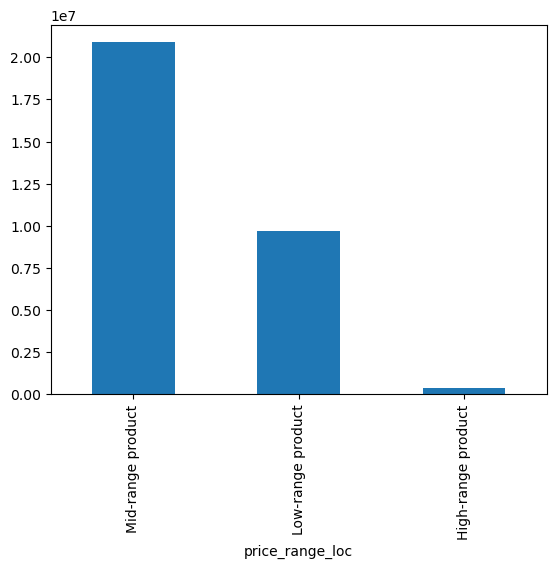

In [35]:
# Bar chart: Number of orders by price range
price_range_bar = ords_prods_active['price_range_loc'].value_counts().plot.bar()

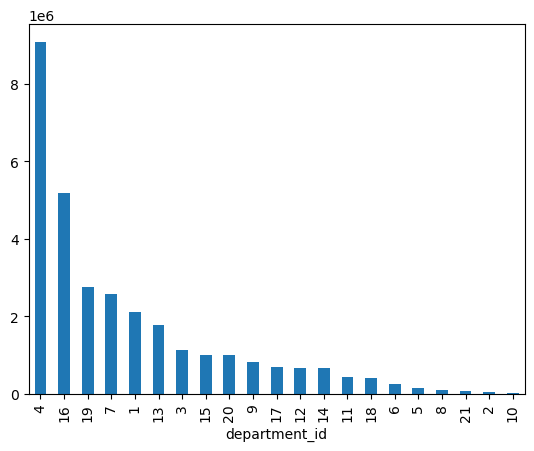

In [40]:
# Bar chart: Number of orders by department_id
orders_departments_bar = ords_prods_active['department_id'].value_counts().plot.bar()

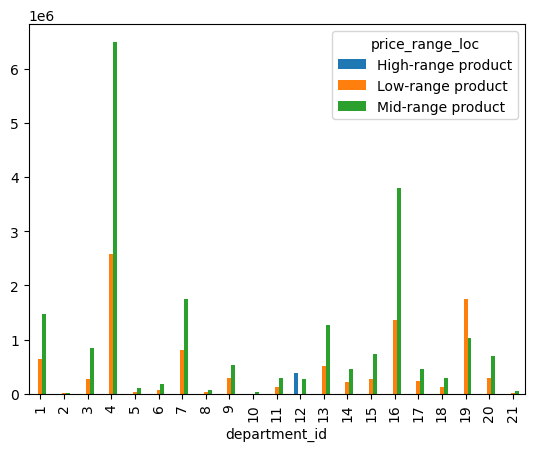

In [38]:
# Bar chart: Number of orders by department_id and price_ranges
departments_price_ranges_bar = departments_price_ranges.plot.bar()

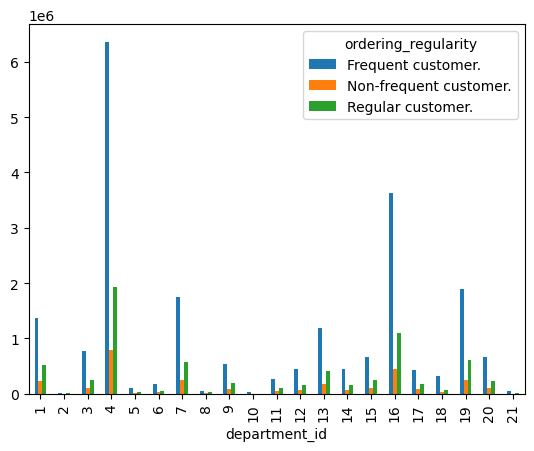

In [44]:
# Bar chart: Number of orders by department_id and ordering regularity
departments_freq_bar = departments_freq.plot.bar()

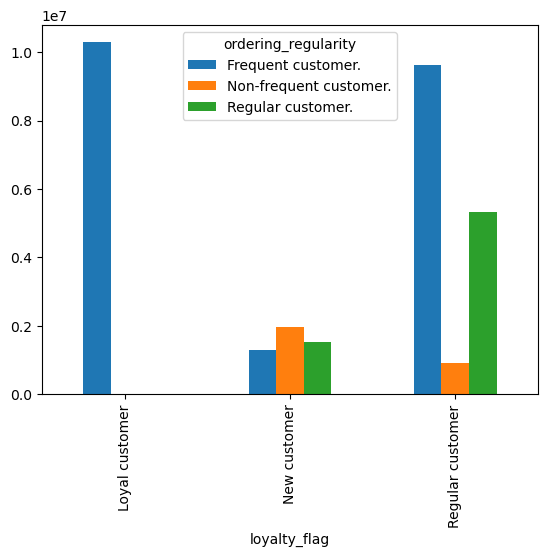

In [47]:
# Bar chart: Number of orders by loyalty_flag and ordering regularity
loyalty_freq_bar = loyalty_freq.plot.bar()

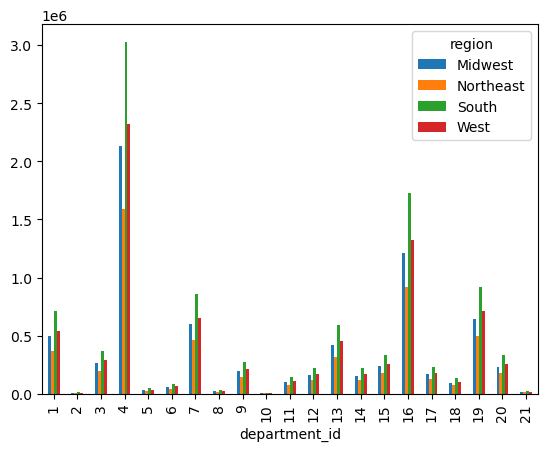

In [36]:
# Bar chart: Number of orders by department_id and region
region_department_bar = regions_departments.plot.bar()

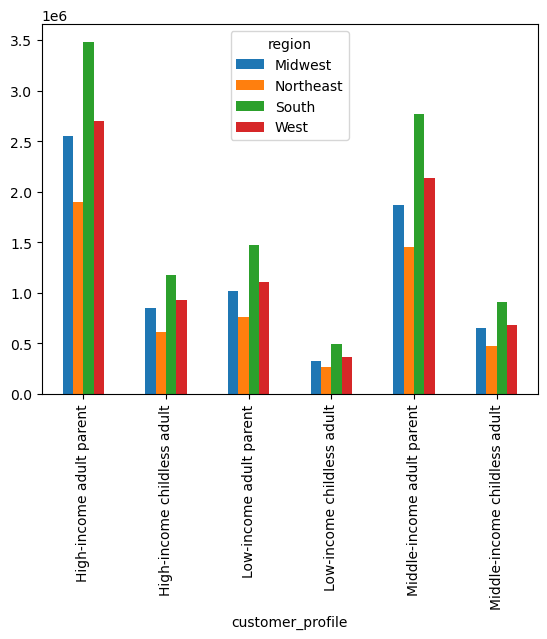

In [43]:
# Bar chart: Number of orders by customer profile and region
region_customers_bar = regions_customers.plot.bar()

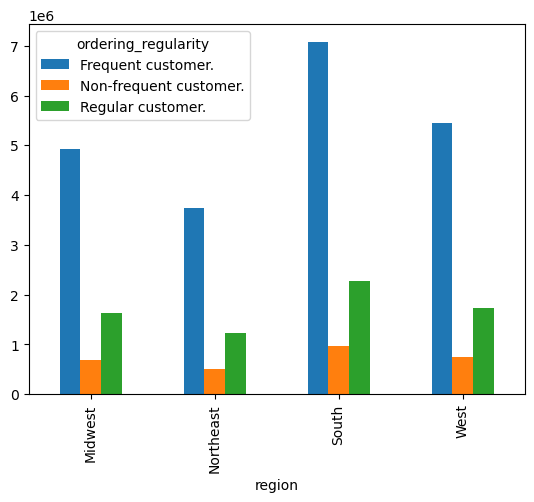

In [50]:
# Bar chart: Number of orders by region and ordering regularity
regions_freq_bar = regions_freq.plot.bar()

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

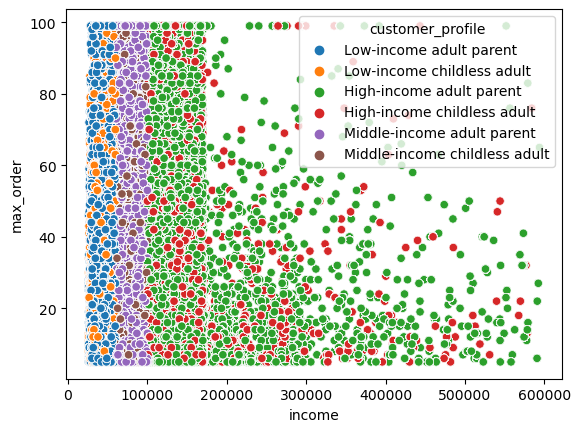

In [41]:
# Scatterplot: Orders by income, max orders, and customer profile
region_department_scatter = sns.scatterplot(x = 'income', y = 'max_order', hue = 'customer_profile', data = ords_prods_active)

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

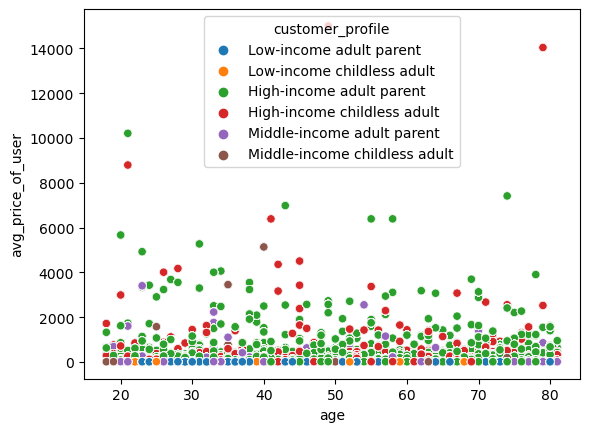

In [42]:
# Scatterplot: Orders by age, average user expendenture, and customer profile
prices_age_scatter = sns.scatterplot(x = 'age', y = 'avg_price_of_user', hue = 'customer_profile', data = ords_prods_active)

In [45]:
# Export visualizations
region_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_bar.png'))

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_19028\1396654615.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  region_department_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_scatter.png'))
C:\Users\Lawrence\AppData\Local\Temp\ipykernel_19028\1396654615.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  prices_age_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_age_scatter.png'))


In [ ]:
region_customers_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_customers_bar.png'))

In [ ]:
region_department_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_scatter.png'))

In [ ]:
prices_age_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_age_scatter.png'))

In [36]:
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

In [39]:
departments_price_ranges_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_price_range_bar.png'))

In [41]:
orders_departments_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_departments_bar.png'))

In [45]:
departments_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_frequency_bar.png'))

In [48]:
loyalty_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_frequency_bar.png'))

In [51]:
regions_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_frequency_bar.png'))

# 05. Export final dataset

In [53]:
# Export final dataset
ords_prods_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))